In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the four possible amplitude levels for PAM4
amplitude_levels = [3, 1, -1, -3]


In [3]:
def pam4_encode(data):
    # Split the data into pairs of bits
    data_pairs = [data[i:i+2] for i in range(0, len(data), 2)]
    
    # Encode each pair of bits as a pulse with one of the four amplitude levels
    pulses = [amplitude_levels[int(pair, 2)] for pair in data_pairs]
    
    return pulses

In [4]:
def pam4_decode(pulses):
    # Calculate the decision threshold as the average of adjacent amplitude levels
    threshold = (amplitude_levels[0] + amplitude_levels[1]) / 2
    
    # Decode each pulse by comparing it to the decision threshold
    data_pairs = ['01' if pulse >= threshold else '10' if pulse <= -threshold else '00' for pulse in pulses]
    
    # Concatenate the pairs of bits to reconstruct the original data
    data = ''.join(data_pairs)
    
    return data

In [21]:
# Generate a random binary data sequence
np.random.seed(0)
data = np.random.randint(0, 2, 32)
data_str = ''.join(map(str, data))
data_str

'01101111111001000001011001111010'

In [20]:
# Encode the data using PAM4
pulses = pam4_encode(data_str)
pulses

[1, -1, -3, -3, -3, -1, 1, 3, 3, 1, 1, -1, 1, -3, -1, -1]

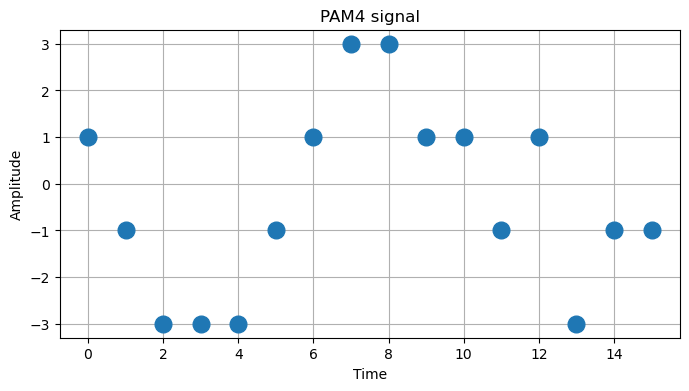

In [30]:
# Plot the PAM4 signal
fig = plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.plot(range(len(pulses)), pulses, 'o', markersize=12)
ax.set(xlabel='Time', ylabel='Amplitude', title='PAM4 signal')
ax.grid()

In [23]:
# Add some noise to the PAM4 signal
noise = np.random.normal(0, 1, len(pulses))
noisy_pulses = pulses + noise

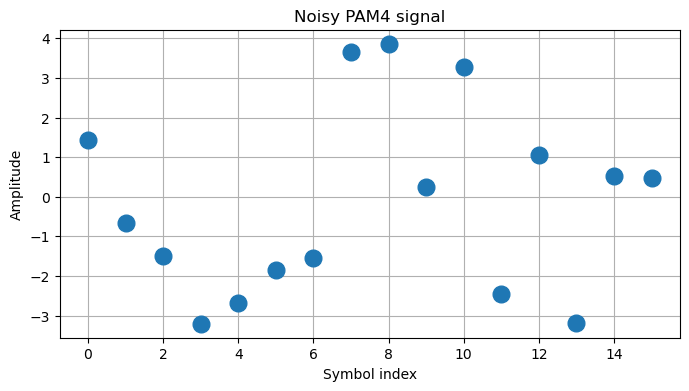

In [31]:
# Plot the noisy PAM4 signal
fig = plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.plot(range(len(noisy_pulses)), noisy_pulses, 'o', markersize=12)
ax.set(xlabel = 'Symbol index', ylabel = 'Amplitude', title = 'Noisy PAM4 signal')
ax.grid()

In [25]:
# Decode the noisy PAM4 signal
decoded_data = pam4_decode(noisy_pulses)


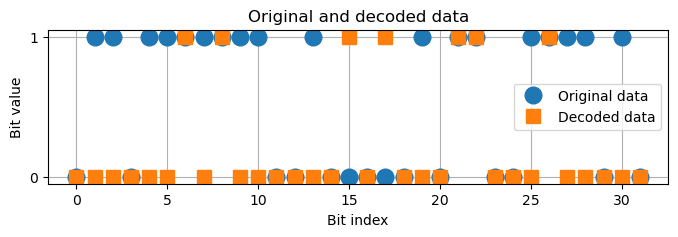

In [33]:
# Plot the original and decoded data
fig = plt.figure(figsize=(8, 2))
ax = plt.axes()
ax.plot(range(len(data)), data, 'o', markersize=12)
ax.plot(range(len(decoded_data)), [int(d) for d in decoded_data], 's', markersize=10)
ax.set(xlabel='Bit index', ylabel='Bit value', title='Original and decoded data', yticks=[0, 1], yticklabels=['0', '1'])
ax.legend(['Original data', 'Decoded data'])
ax.grid()